Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

### Provided

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox

# If you're working locally:
else:
    DATA_PATH = '../data/'

## Import

In [11]:
import numpy as np 
import pandas as pd 
import os 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
# import eli5
# from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox.pdp import pdp_isolate, pdp_plot

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Functions

In [3]:
def get_some(year):
    df = pd.DataFrame(
            columns=['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'name', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'location',
       'friends', 'is_backing', 'is_starred', 'permissions']
    )
    folders = os.listdir(f'Data\\{year}') #Get the monthly folders inside the year
    for folder in folders[:1]:
        files = os.listdir(f'Data\\{year}\\{folder}')  #Get the filenames inside monthly folders
        monthly = pd.concat(
            [pd.read_csv(
                f'Data\\{year}\\{folder}\\{file}') for file in files[:2]] #Not getting a whole year for now
        ) #Reads in all the csv files in a given month
        df = df.append(monthly)
        df = df.reset_index().drop(columns='index')
    return df

def datetime_convert(df):
    #Time series data
    df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
    df['deadline'] = pd.to_datetime(df['deadline'], unit='s')
    df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
    df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s')
#     df['created_at'] = pd.to_datetime(df['created_at'], format='%m%d%Y')
#     df['deadline'] = pd.to_datetime(df['deadline'], format='%m%d%Y')
#     df['launched_at'] = pd.to_datetime(df['launched_at'], format='%m%d%Y')
#     df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], format='%m%d%Y')
    return df

def drop_dupes(df):
    df = df[~df.duplicated('id')]
    return df

## Fetch and wrangle

##### Fetch

In [6]:
cd C:\Users\Hakuj\Documents\DataSets\Kickstarter

C:\Users\Hakuj\Documents\DataSets\Kickstarter


In [7]:
df = get_some(2018)

##### Wrangle

In [8]:
df = drop_dupes(df)

## PDP 

#### Model

In [45]:
model = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

In [31]:
X = df.drop(columns=['state','pledged', 'usd_pledged', 'state'])
y = df['state']

In [32]:
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
X_train_transformed = transformer.fit(X_train)
X_test_transformed = transformer.fit(X_test)

In [46]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('ordinalencoder',
                 OrdinalEncoder(cols=[1, 2, 4, 6, 7, 8, 10, 18, 19, 20, 21, 22,
                                      27, 28, 29, 30, 33],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 1, 'data_type': dtype('...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                

In [28]:
X_test.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'created_at', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'deadline', 'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable', 'launched_at', 'name', 'photo', 'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_type', 'location', 'friends', 'is_backing', 'is_starred', 'permissions'], dtype='object')

#### Plot

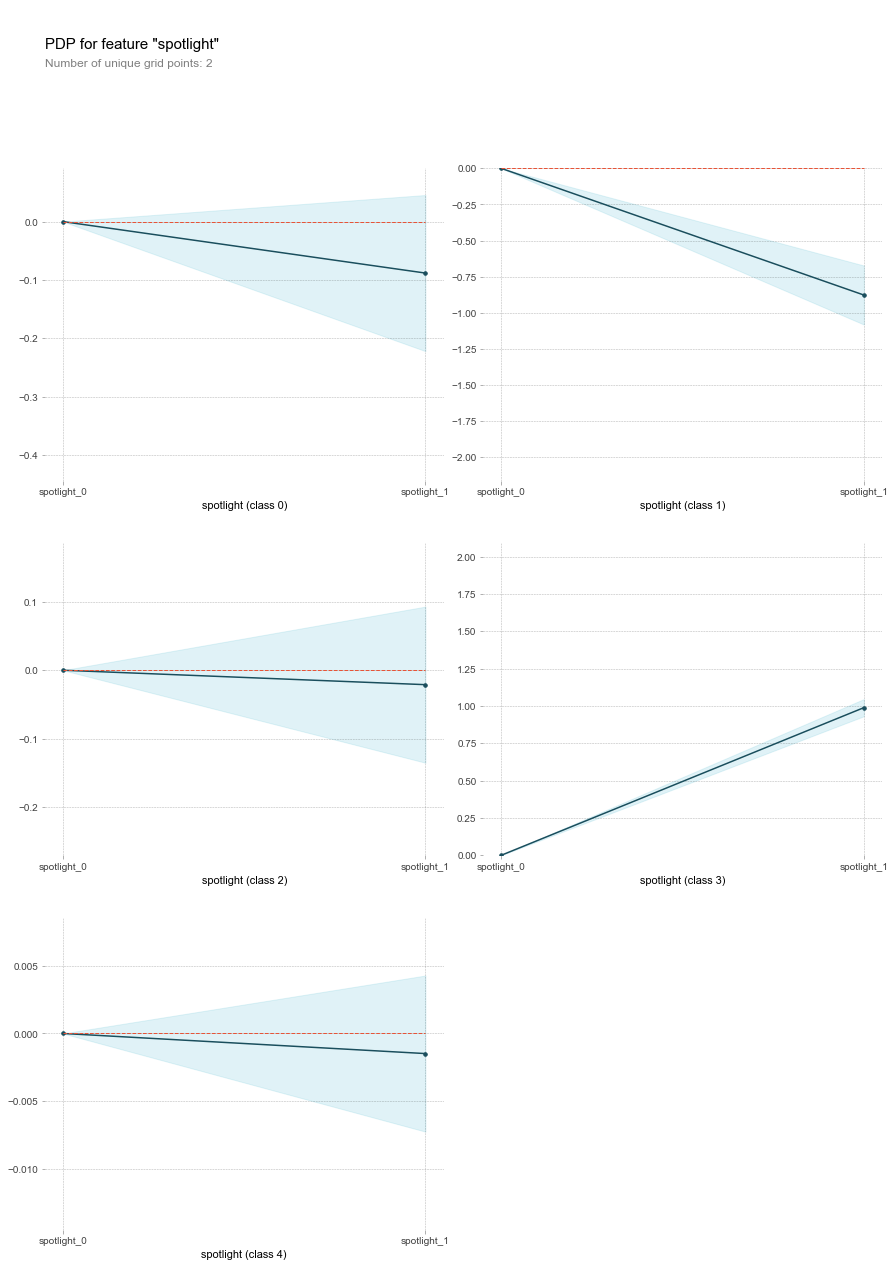

In [48]:
isolated = pdp_isolate(
    model=model,
    dataset=X_test,
    model_features=X_test.columns,
    feature='spotlight'
)
pdp_plot(isolated, feature_name='spotlight');

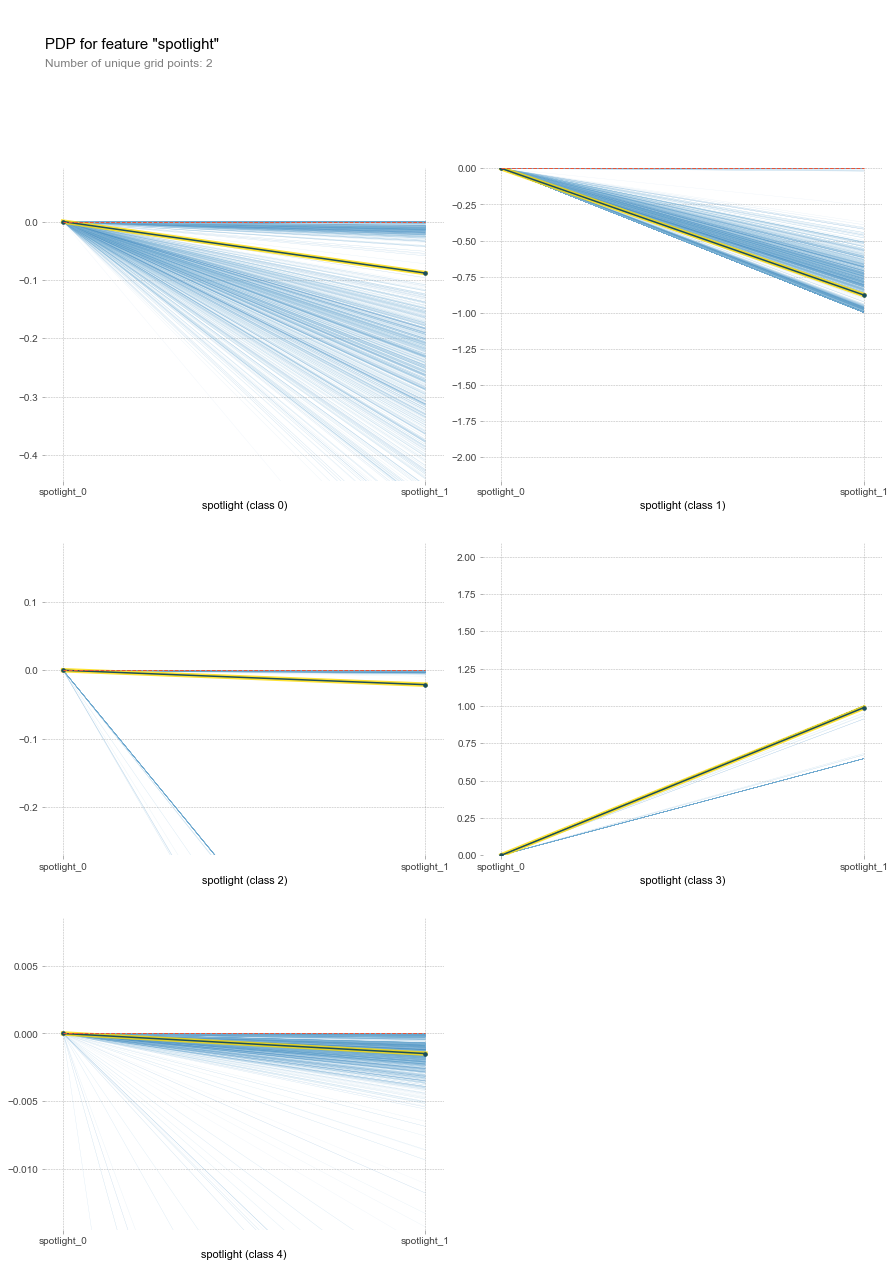

In [50]:
pdp_plot(isolated, feature_name='spotlight', plot_lines=True);